[*********************100%%**********************]  1 of 1 completed


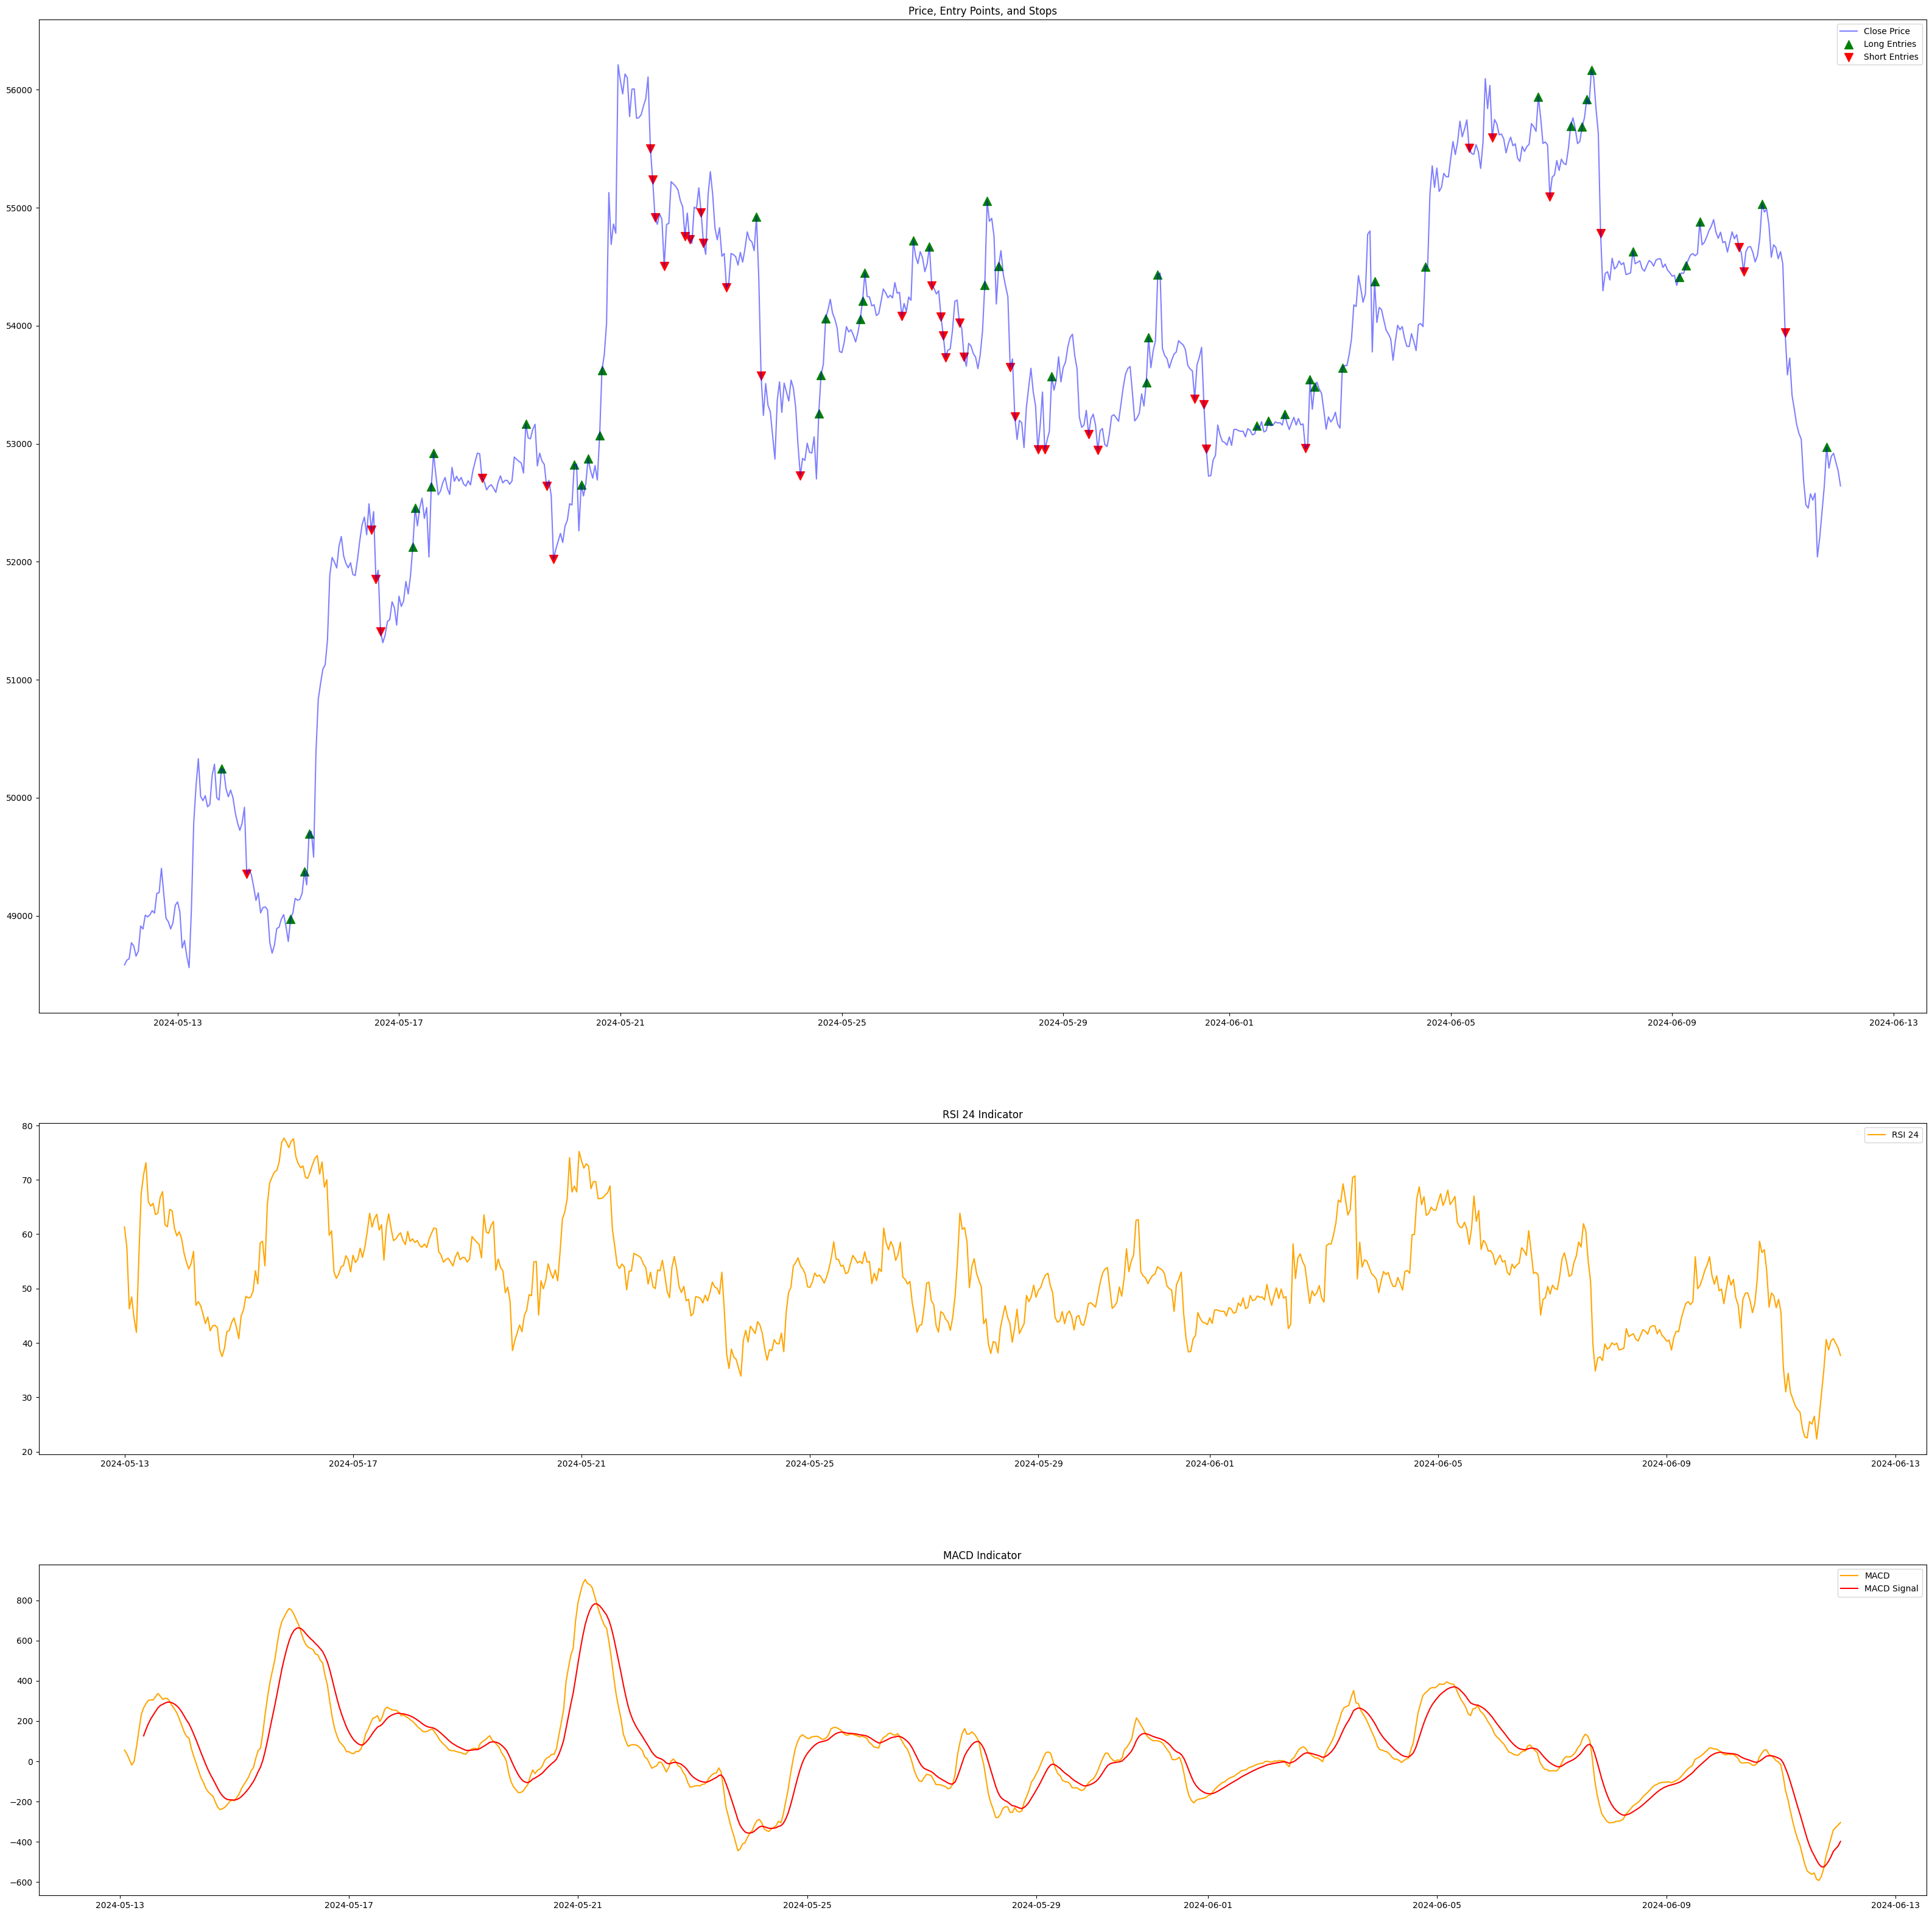

In [89]:
import numpy as np
import pandas as pd
import ta
import yfinance as yf
import matplotlib.pyplot as plt

# Fetch 15-minute data for the last month for BTCGBP
ticker = 'BTC-GBP'
data = yf.download(tickers=ticker, period='1mo', interval='1h')

# Convert column names to lowercase
data.columns = [col.lower() for col in data.columns]

# Define the strategy parameters
length = 5
numATRs = 0.75

# Calculate the ATR based on the defined length and multiplier
data['atr'] = ta.volatility.average_true_range(data['high'], data['low'], data['close'], length) * numATRs

# Define upper and lower bands
data['upper_band'] = data['close'].shift(1) + data['atr'].shift(1)
data['lower_band'] = data['close'].shift(1) - data['atr'].shift(1)

# Introduce MACD indicators
data['macd'] = ta.trend.macd(data['close'])
data['macd_signal'] = ta.trend.macd_signal(data['close'])  # Added MACD signal

# Introduce RSI indicator with period 24
data['rsi_24'] = ta.momentum.rsi(data['close'], window=24)

# Apply the strategy with RSI conditions and MACD confirmation
data['long_entry'] = (data['close'] > data['upper_band']) & (data['rsi_24'] < 65) & (data['macd_signal'] < data['macd'])
data['short_entry'] = (data['close'] < data['lower_band']) & (data['rsi_24'] > 35) & (data['macd_signal'] > data['macd'])

# Plotting the price, bands, entry points, RSI, and MACD for visualization
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(40, 40), gridspec_kw={'height_ratios': [3, 1, 1]})

# Plot price, bands, and entry points
ax1.plot(data['close'], label='Close Price', color='blue', alpha=0.5)
ax1.scatter(data.index[data['long_entry']], data['close'][data['long_entry']], label='Long Entries', color='green', marker='^', s=100)
ax1.scatter(data.index[data['short_entry']], data['close'][data['short_entry']], label='Short Entries', color='red', marker='v', s=100)
ax1.set_title('Price, Entry Points, and Stops')
ax1.legend()

# Plot RSI 24
ax2.plot(data['rsi_24'], label='RSI 24', color='orange')
ax2.set_title('RSI 24 Indicator')
ax2.legend()

# Plot MACD and MACD Signal
ax3.plot(data['macd'], label='MACD', color='orange')
ax3.plot(data['macd_signal'], label='MACD Signal', color='red')  # Added MACD Signal plot
ax3.set_title('MACD Indicator')
ax3.legend()

plt.show()


[*********************100%%**********************]  1 of 1 completed


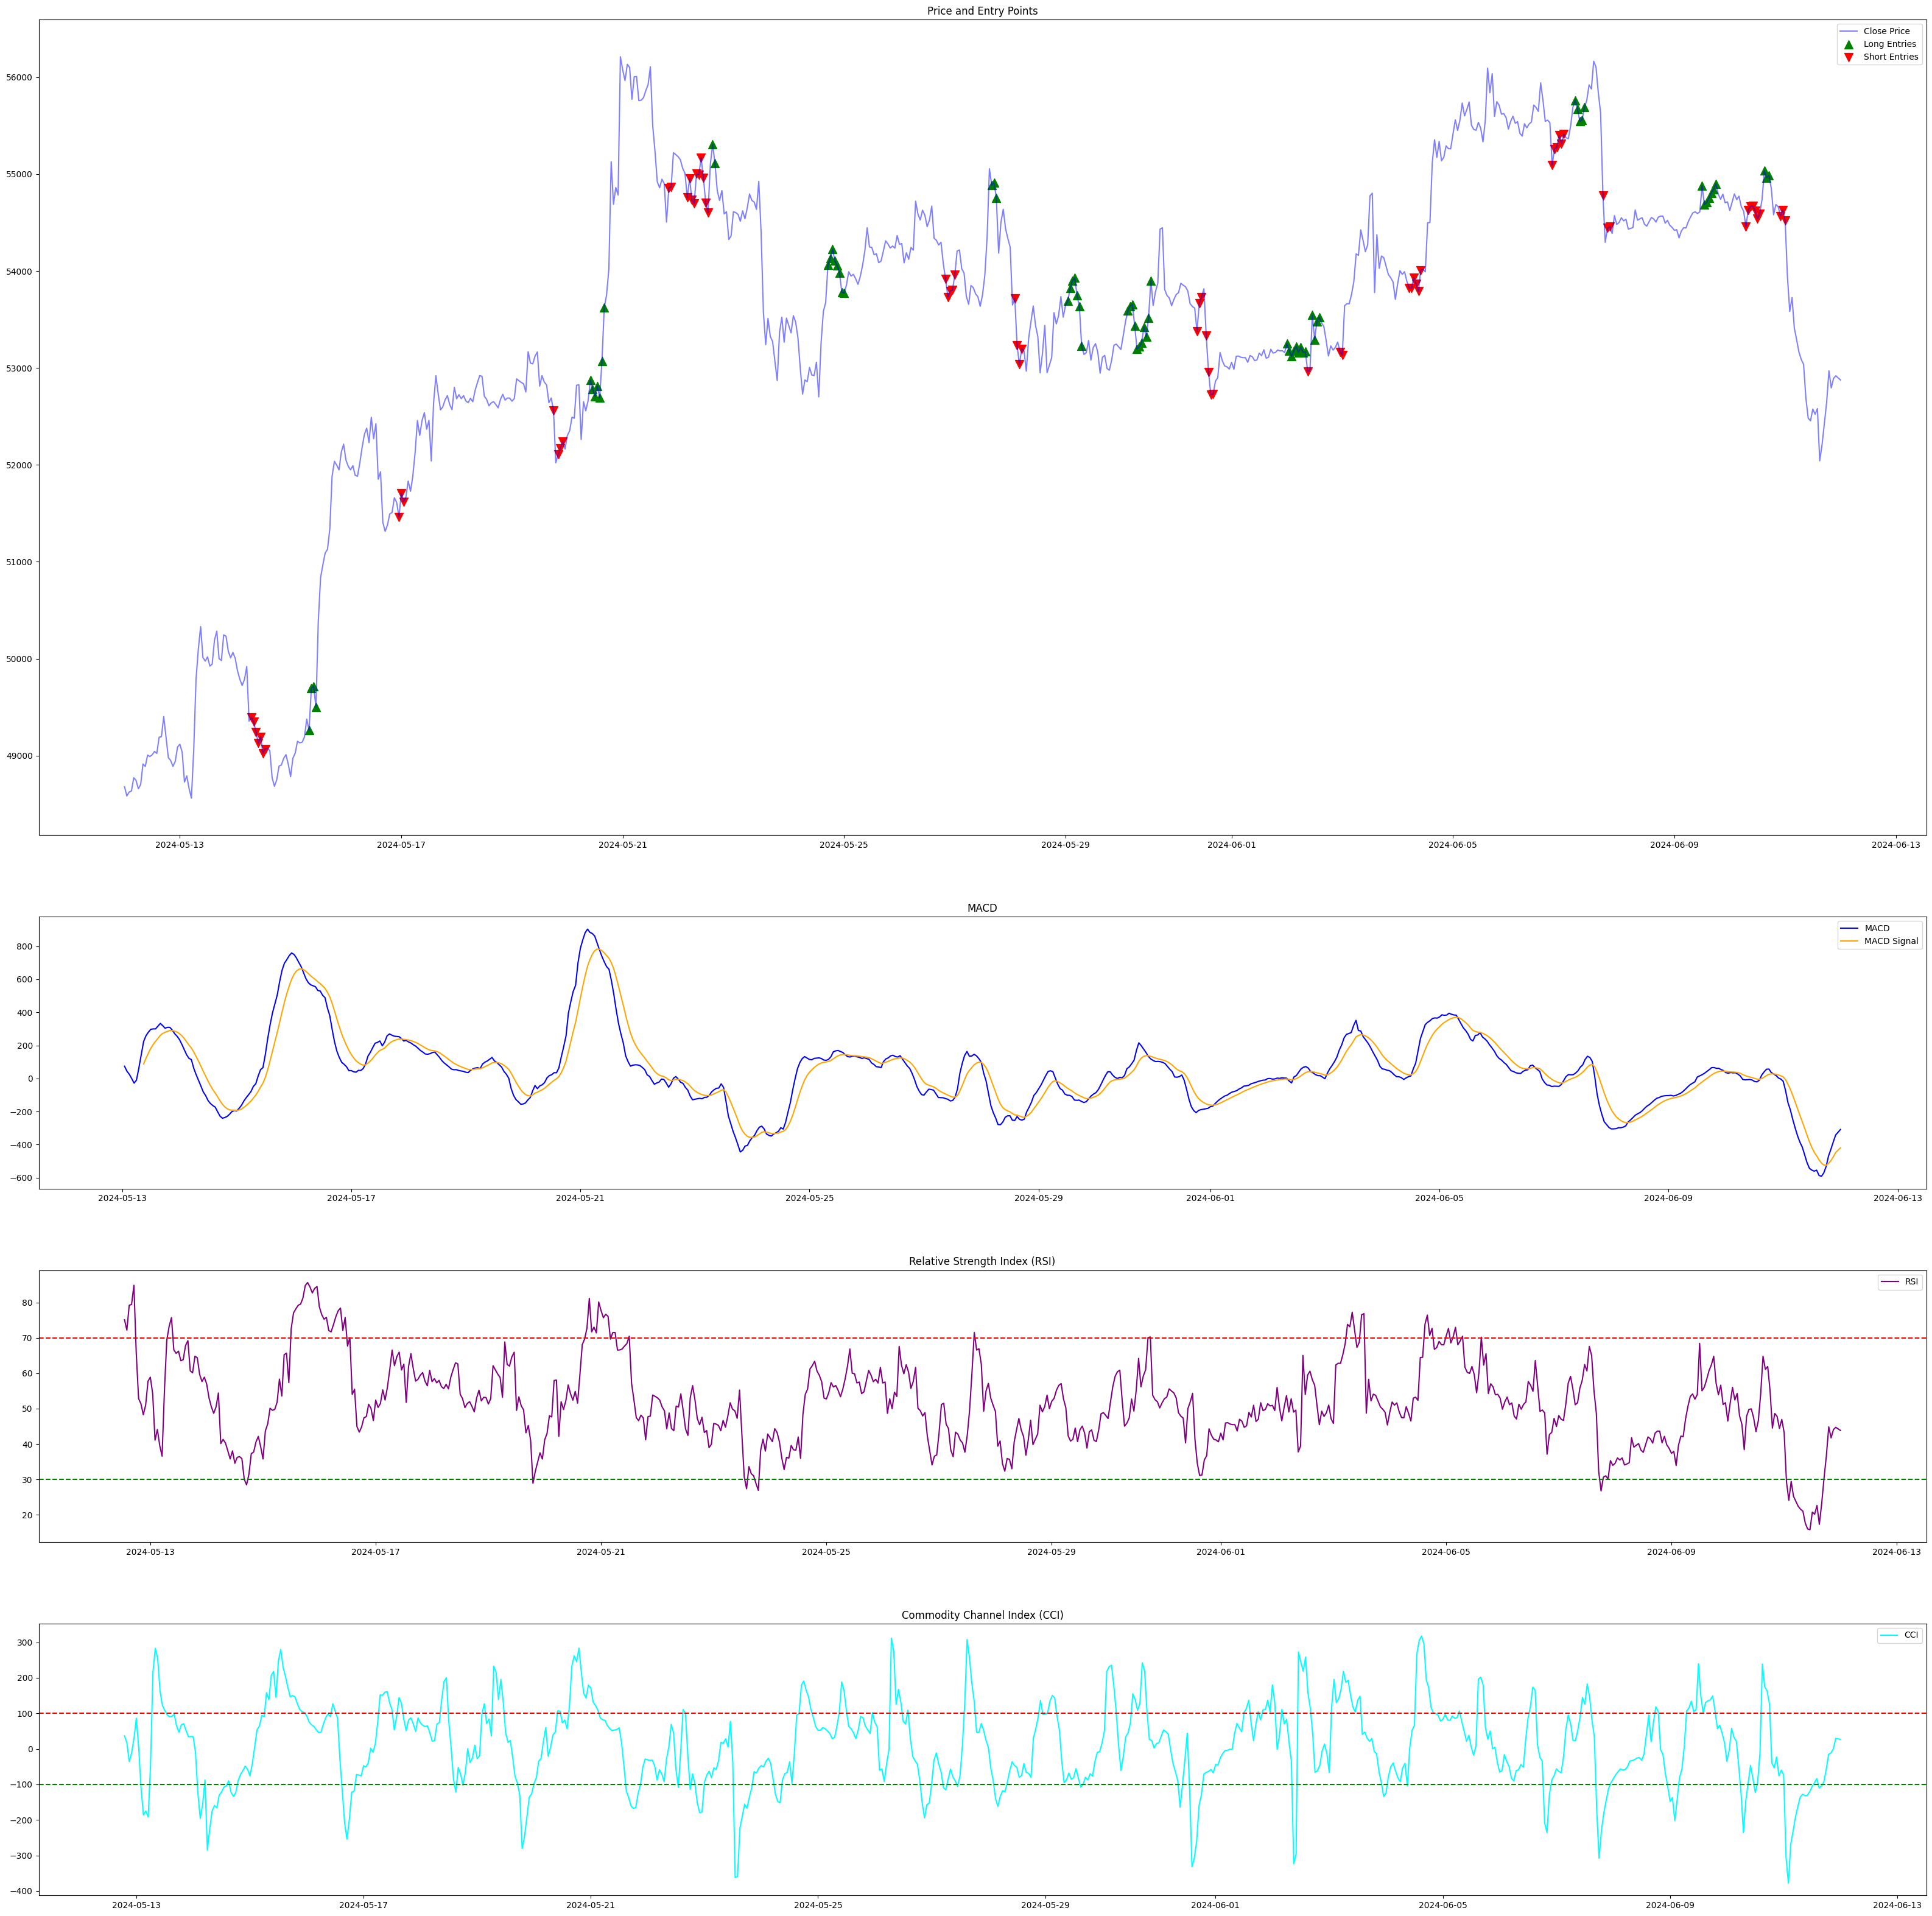

In [47]:
import numpy as np
import pandas as pd
import ta
import yfinance as yf
import matplotlib.pyplot as plt

# Fetch hourly data for the last month for BTCGBP
ticker = 'BTC-GBP'
data = yf.download(tickers=ticker, period='1mo', interval='1h')

# Convert column names to lowercase
data.columns = [col.lower() for col in data.columns]

# Calculate MACD and its signal line
data['macd'] = ta.trend.macd(data['close'])
data['macd_signal'] = ta.trend.macd_signal(data['close'])

# Define MACD trend direction with a margin
macd_margin = 1 * (data['macd'].abs() + data['macd_signal'].abs()) / 2
data['macd_trend'] = (data['macd'] - data['macd_signal']) > macd_margin

# Calculate RSI
data['rsi'] = ta.momentum.rsi(data['close'])

# Calculate CCI
data['cci'] = ta.trend.cci(data['high'], data['low'], data['close'])

# Apply the strategy with MACD confirmation, margin, and RSI filtering
data['long_entry'] = data['macd_trend'] & (data['rsi'] > 30) & (data['rsi'] < 70) & (data['cci'] > -80)
data['short_entry'] = ((data['macd_signal'] - data['macd']) > macd_margin) & (data['rsi'] > 30) & (data['rsi'] < 70) & (data['cci'] < 80)

# Plotting the price, MACD, RSI, and CCI for visualization
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(40, 40), gridspec_kw={'height_ratios': [3, 1, 1, 1]})

# Plot price and entry points
ax1.plot(data['close'], label='Close Price', color='blue', alpha=0.5)
ax1.scatter(data.index[data['long_entry']], data['close'][data['long_entry']], label='Long Entries', color='green', marker='^', s=100)
ax1.scatter(data.index[data['short_entry']], data['close'][data['short_entry']], label='Short Entries', color='red', marker='v', s=100)
ax1.set_title('Price and Entry Points')
ax1.legend()

# Plot MACD
ax2.plot(data['macd'], label='MACD', color='blue')
ax2.plot(data['macd_signal'], label='MACD Signal', color='orange')
ax2.set_title('MACD')
ax2.legend()

# Plot RSI
ax3.plot(data['rsi'], label='RSI', color='purple')
ax3.axhline(70, color='red', linestyle='--')
ax3.axhline(30, color='green', linestyle='--')
ax3.set_title('Relative Strength Index (RSI)')
ax3.legend()

# Plot CCI
ax4.plot(data['cci'], label='CCI', color='cyan')
ax4.axhline(100, color='red', linestyle='--')
ax4.axhline(-100, color='green', linestyle='--')
ax4.set_title('Commodity Channel Index (CCI)')
ax4.legend()

plt.show()
